<a href="https://colab.research.google.com/github/ssmatana/czechitas/blob/main/Copy_of_czechitas_season1_episode3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

This section contains steps that you need to do before you are able to run exercises in this notebook. You only have to run them once per session, then all
the exercises should work.

Start by executing first cell, that installs neccessary libraries:

In [ ]:
!pip install ipympl
!pip install mpl_interactions
!pip install celluloid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 510 kB 33.7 MB/s 
     |████████████████████████████████| 11.2 MB 48.3 MB/s 
     |████████████████████████████████| 1.6 MB 48.4 MB/s 
     |████████████████████████████████| 965 kB 14.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 3.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now continue by restarting the runtime. You can restart the runtime by clicking on the "Runtime" -> "Restart runtime" in the menu above the notebook.

Finally, run cell below to import dependencies:

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

%matplotlib widget

import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from numpy.random import normal
import math 
from numpy.random import randn
from itertools import product
from sklearn.model_selection import train_test_split

Now you are all set !

# Exercise 2.1: Gradient descent

Gradient descent is an optimization algorithm widely used in neural network training. Its basic idea is to descent toward lower values of a function by taking steps opposite to its derivative (gradient in multidimensional case). There are multiple variants of this algorithm, of which, some examples can be found below.

## Basic version

Basic version of gradient descend might easily get stuck in local minima. In the example below change the learning rate ALPHA and see what happens !

In [ ]:

ALPHA = 0.5 # CHANGE THIS !

#######

def fx(x):
    return 3*(x**0.5) + np.sin(x)
def dfx(x):
    return (1.5/(x**0.5)) + np.cos(x)

def sgd(x,a,dfx):
    return x-(a*dfx(x))

fig, ax = plt.subplots(figsize=(19, 10)) # let's make it bigger
camera = Camera(fig)# the camera gets our figure

opti_x=np.zeros(40)
opti_x[0] = 8

for i in range(1,len(opti_x)):
    opti_x[i] = sgd(opti_x[i-1], ALPHA, dfx)
    
x = np.linspace(0.1,10,200)
y = fx(x)

plt.xlabel("Parameter")
plt.ylabel("Error")
for i in range(len(opti_x)):
  ax.plot(x,y,color="blue")
  ax.axvline(x=opti_x[0],color="red")
  ax.scatter(opti_x[0:i], fx(opti_x[0:i]), 100, 'r')
  camera.snap()


plt.close()

animation = camera.animate()
HTML(animation.to_html5_video())


## Stochastic gradient descent

Example below simulates the effect of subsampling in stochastic gradient descent. The main idea is that the addition of noise helps get gradient descent unstuck. Play with learning rate ALPHA and the parameter RANDOMNESS which controls the amount of random noise. See what happens.

In [ ]:
ALPHA = 0.5    # Change this
RANDOMNESS = 1 # Change this

#######

from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

def fx(x):
    return 3*(x**0.5) + np.sin(x)
def dfx(x):
    return (1.5/(x**0.5)) + np.cos(x) + normal(0,RANDOMNESS)

def sgd(x,a,dfx):
    return x-(a*dfx(x))

fig, ax = plt.subplots(figsize=(19, 10)) # let's make it bigger
camera = Camera(fig)# the camera gets our figure


opti_x=np.zeros(40)
opti_x[0] = 7


for i in range(1,len(opti_x)):
    opti_x[i] = sgd(opti_x[i-1], ALPHA, dfx)

    
x = np.linspace(0.1,10,200)
y = fx(x)

plt.xlabel("Parameter")
plt.ylabel("Error")
for i in range(len(opti_x)):
  ax.plot(x,y,color="blue")
  ax.axvline(x=opti_x[0],color="red")
  ax.scatter(opti_x[0:i], fx(opti_x[0:i]), 100, 'r')
  camera.snap()


plt.close()

animation = camera.animate()
HTML(animation.to_html5_video())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


## Gradient descent with momentum

Gradient descent with momentum uses analogy of motion in physcis. In the example below, play with parameters ALPHA (learning rate) and BETA. The parameter BETA controls how hard it is for the particle to change motion. In essence, this corresponds to its mass.

In [ ]:
ALPHA = 0.5 #Change this !
BETA = 0.6  #Change this !
##############

def fx(x):
    return 3*(x**0.5) + np.sin(x)
def dfx(x):
    return (1.5/(x**0.5)) + np.cos(x)
  

fig, ax = plt.subplots(figsize=(19, 10)) # let's make it bigger
camera = Camera(fig)# the camera gets our figure


opti_x=np.zeros(40)
opti_x[0] = 8

update = 0
for i in range(1,len(opti_x)):
    update = BETA*update - ALPHA*dfx(opti_x[i-1])
    opti_x[i] = opti_x[i-1] + update
    
x = np.linspace(0.1,10,200)
y = fx(x)

plt.xlabel("Parameter")
plt.ylabel("Error")
for i in range(len(opti_x)):
  ax.plot(x,y,color="blue")
  ax.axvline(x=opti_x[0],color="red")
  ax.scatter(opti_x[0:i], fx(opti_x[0:i]), 100, 'r')
  camera.snap()


plt.close()

animation = camera.animate()
HTML(animation.to_html5_video())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


# Gradient Descent in Multiple Dimensions

In case of 2 parameters, the error curve becomes an error surface and the derivative becomes a vector called gradient. While the essence of gradient descent algorithm stays the same, the extension to multiple dimension brings new problems. The main problem that can lead to poor learning performance is different scale of different features. Make sure to normalize your features to common, or at least similar, scale before training.


Text(0.5, 0, 'Error')

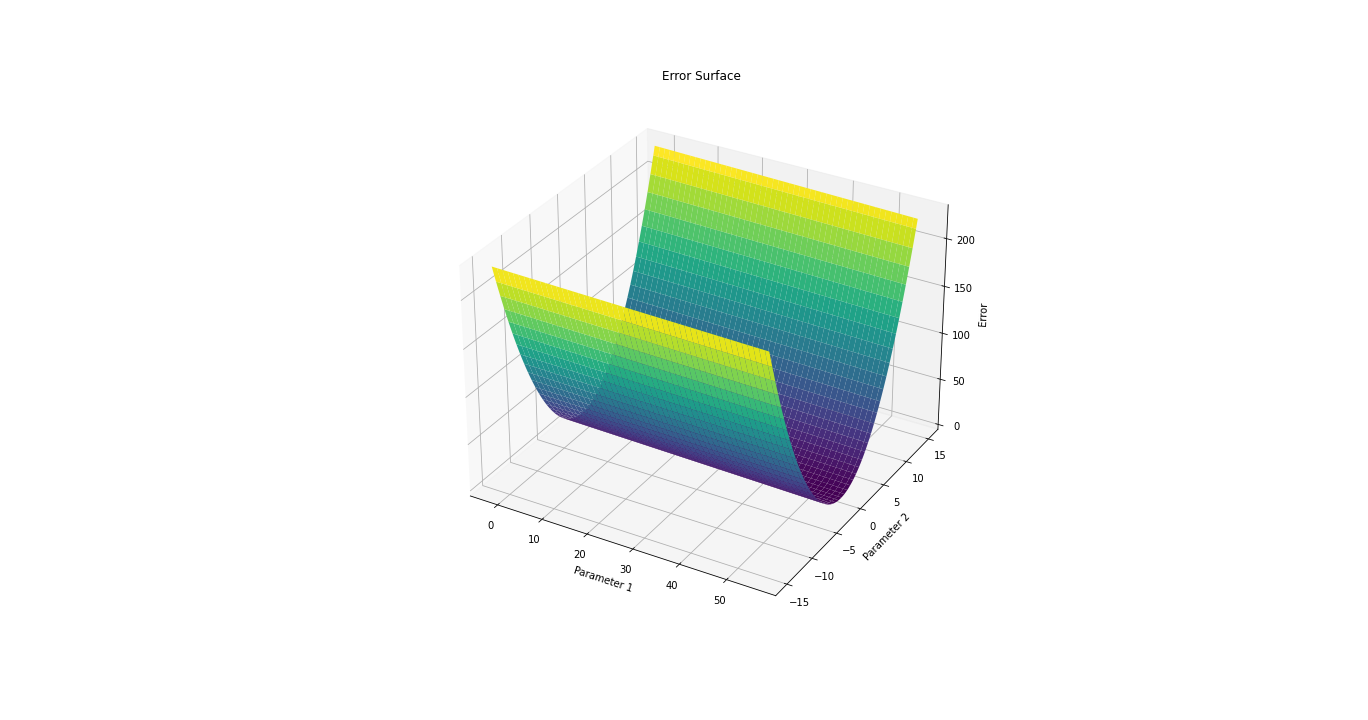

In [ ]:
from mpl_toolkits import mplot3d

def paraboloid(x1,x2):
  return x2**2 - 0.1*x1 + 5

def grad_paraboloid(pos):
  return np.array([
      -0.1,
      2*pos[1]
  ])

MAX_ITER = 105
ALPHA = 0.1
BETA = 0.95

xs = np.linspace(-2,56,200)
ys = np.linspace(-15,15,100)

grid = np.meshgrid(xs,ys)
func_values = paraboloid(grid[0],grid[1])

fig = plt.figure(figsize=(19, 10))
ax = plt.axes(projection='3d')

ax.plot_surface(*grid, func_values,cmap='viridis', edgecolor='none')
ax.set_title('Error Surface')
ax.set_xlabel("Parameter 1")
ax.set_ylabel("Parameter 2")
ax.set_zlabel("Error")



In [ ]:
fig,axes = plt.subplot_mosaic([
    ["left","upper_right"],
    ["left","lower_right"]
  ],
  figsize=(19, 10)
)

camera = Camera(fig)

pos_vanilla = np.array([-0.5,-12])

pos_momentum = np.array([-0.5,-12])
momentum_update = np.array([0,0])

vanilla_errors = []
momentum_errors = []

dvanilla = np.array([0,0])
dmomentum = np.array([0,0])

axes["left"].set_xlim(-2,20)
for i in range(MAX_ITER):
  vanilla_errors.append(paraboloid(*pos_vanilla))
  momentum_errors.append(paraboloid(*pos_momentum))

  axes["left"].contour(*grid,func_values,levels=15)
  axes["left"].scatter(pos_vanilla[0],pos_vanilla[1],color="orange",s=100)
  axes["left"].scatter(pos_momentum[0],pos_momentum[1],color="green",s=100)
  axes["left"].arrow(*pos_vanilla,*(-dvanilla),color="orange",head_width=0.3)
  axes["left"].arrow(*pos_momentum,*(-dmomentum),color="green",head_width=0.3)
  axes["left"].arrow(15,0,4,0,color="red",head_width=0.3)
  axes["left"].text(15,-0.6,"Minimum this way",color="red")
  axes["left"].set_xlabel("Parameter 1")
  axes["left"].set_ylabel("Parameter 2")

  axes["upper_right"].plot(vanilla_errors,color="orange")
  axes["upper_right"].plot(momentum_errors,color="green")
  axes["upper_right"].set_xlabel("Iteration")
  axes["upper_right"].set_ylabel("Error")

  axes["lower_right"].plot(vanilla_errors,color="orange")
  axes["lower_right"].plot(momentum_errors,color="green")
  axes["lower_right"].set_xlabel("Iteration")
  axes["lower_right"].set_ylabel("Error")
  axes["lower_right"].set_ylim(0,20)
  camera.snap()

  dvanilla = grad_paraboloid(pos_vanilla)
  dmomentum = grad_paraboloid(pos_momentum)

  pos_vanilla = pos_vanilla - ALPHA*dvanilla

  momentum_update = BETA*momentum_update - ALPHA*dmomentum
  pos_momentum = pos_momentum + momentum_update

plt.close()

animation = camera.animate()
HTML(animation.to_html5_video())


# Training Neural Networks

In this chapter, we will ilustrate how neural networks learn. The chapter will contain interactive exercises that will help you get some intuition and show you how you would go about training a neural network in the real world.

### Exercise 3.2: Implementing Neuron That Learns

Code below presents a basic implementation of sigmoid neuron that is able to learn on its own. Say "Bye !" to those sliders ! While at the first sight, it might seem that there is a lot of code, most of the code below implements visualization rather than the neuron or its training. The interesting functions are:

 * *neuron_output*: Output of a neuron for a given input, uses matrix multiplication and sigmoid
 * *calculate_error*: Mean squared error (MSE) of network predictions
 * *gradient_of_error*: Gradient of error (MSE) with respect to network parameters

The most complicated function is *gradient_of_error*. Sigmoid neural network belongs to the minority of networks, for which, the gradient can be derived mathematically. That's why I was able to write down commands to calculate it. Luckily, these days, deep learning frameworks, like Tensorflow or Torch, derive formulas for gradient automatically, so you seldom have to worry about this in practice ! 

**Exercise**:

 1. Finish code for gradient descent update, the code is marked by "FINISH THIS"
 2. Play with MAX_ITERATIONS and ALPHA, change their values, run the code and see what happens !
 3. (optional) Try to change the code below to use gradient descent with momentum 

 
The exercise uses AND dataset that you have already encountered before.

In [ ]:



MAX_ITERATIONS = 100 ### CHANGE THIS
ALPHA = 0.4   ### CHANGE THIS

#######

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def add_ones_as_first_column(matrix):
  column_of_ones = np.ones((matrix.shape[0],1))
  return np.hstack([column_of_ones,matrix])
  

def neuron_output(parameters,input):
  input_w_one = add_ones_as_first_column(input)
  potential = np.matmul(input_w_one,parameters)
  return sigmoid(potential)

def calculate_error(actual_output,expected_output):
  return np.sum((expected_output - actual_output)**2) / len(expected_output)

def gradient_of_error(input,expected_output,actual_output):
  output_of_network = np.expand_dims(actual_output,1)
  difference = np.expand_dims(expected_output,1) - output_of_network
  input_w_ones = add_ones_as_first_column(input)
  grad_network = (1 - output_of_network) * input_w_ones
  individual_grads = difference*(-grad_network)
  total_grad = np.sum(individual_grads,axis=0)

  n_rows = input.shape[0]
  return (total_grad*2)/n_rows

def visualize_decision(input,parameters,expected_output,ax):
  x1     = np.linspace(-1.5, 1.5,101)
  x2     = np.linspace(-1.5, 1.5,101)
  grid  = np.array(list(product(x1,x2)))
  neur_output = neuron_output(parameters,grid)
  neur_output_matrix = np.transpose(np.reshape(neur_output,(len(x1),len(x2))))
  
  decision_boundary_slope = -(parameters[1]/parameters[2])
  decision_boundary_intercept = -parameters[0]/parameters[2]
  decision_boundary_points = decision_boundary_slope*x1 + decision_boundary_intercept
  decision_boundary_projection = (decision_boundary_points + 1.5)*100/3

  ax.imshow(neur_output_matrix,origin="lower",extent=[-1.5,1.5,-1.5,1.5])
  ax.scatter(input[:,0],input[:,1],color=["blue" if x else "red" for x in expected_output])
  ax.plot(x1,decision_boundary_points,color="blue")
  ax.set_xlim(-1.5,1.5)
  ax.set_ylim(-1.5,1.5)
  ax.set_title("Decision boundary and output")


def visualize_error(error_log,ax):
  ax.plot(list(range(len(error_log))),error_log,color="blue")
  ax.set_xlabel("Iteration")
  ax.set_ylabel("Error")
  ax.set_title("Error")

fig,ax = plt.subplots(1,2,figsize=(19, 10))
cam = Camera(fig)

parameters = np.array([0.81631183, 1.03131906, 0.61331604])

input = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
expected_output = np.array([0,0,0,1])
error_log = []

for i in range(MAX_ITERATIONS):
  actual_output = neuron_output(parameters,input)
  
  error = calculate_error(actual_output,expected_output)
  error_log.append(error)
  visualize_error(error_log,ax[1])
  
  visualize_decision(input,parameters,expected_output,ax[0])
  
  gradient = gradient_of_error(input,expected_output,actual_output)
  parameters = parameters # FINISH THIS !

  cam.snap()

#neuron_output(parameters,input)

plt.close()
animation = cam.animate()
HTML(animation.to_html5_video())


### Exercise 3.3: Using Real World Data

All the examples we have seen so far used only toy datasets. It is time that we turn our attention to som real-life dataset. In the example below we will use the sigmoidal neuron that we have implemented to identify hand-written digit 9. The cell below uses gradient descent with momentum for training. 

**Exercise**:
 * Play with MAX_ITERATIONS, ALPHA and BETA. Change values and run cell below, which performs training.
 * After the training finishes, run subsequent cell. This cell will generate dashboard that summarizes results of trained neuron. Make sure to change the value of variable NAME to your name.
 * Copy the image and paste it to Miro board !
   * URL: https://miro.com/app/board/uXjVP-jkd5g=/?share_link_id=699199497299
   * Password: ilovenetworks

In [ ]:
MAX_ITERATIONS = 500 # CHANGE THIS
ALPHA = 0.01 # CHANGE THIS
BETA = 0.9 # CHANGE THIS

#################

digits = datasets.load_digits()

image_data = digits["data"]
expected_output = digits["target"] == 9

images_train,images_test,expected_train,expected_test = train_test_split(image_data,expected_output,test_size=0.1,random_state=30)

n_features = image_data.shape[1]
parameters = randn(1 + n_features)
update = np.zeros(1 + n_features)

error_log = []
for i in range(MAX_ITERATIONS):
  actual_output = neuron_output(parameters,images_train)
  
  error = calculate_error(actual_output,expected_train)
  error_log.append(error)
  
  
  gradient = gradient_of_error(images_train,expected_train,actual_output)
  update = BETA*update - ALPHA*gradient
  parameters = parameters + update



Dashboard:

(0.0, 1.0, 0.0, 1.0)

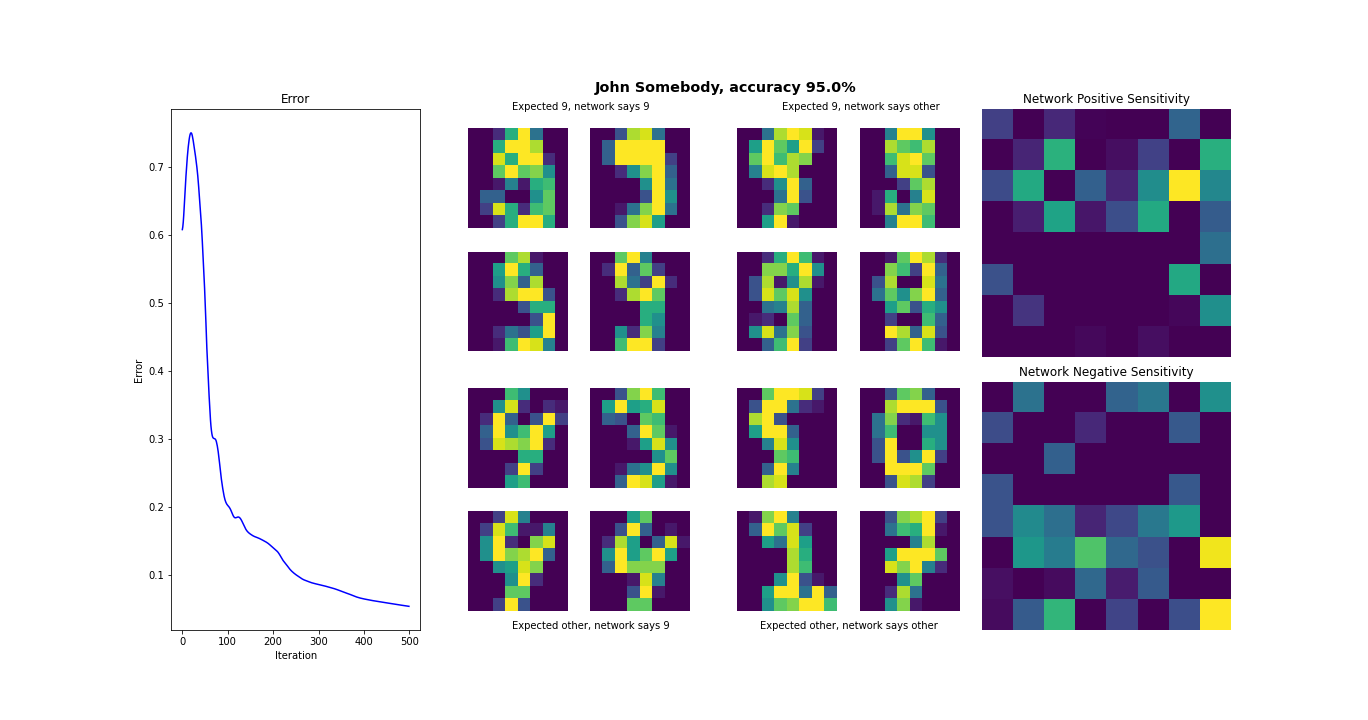

In [ ]:
NAME = "John Somebody" ### Put your name here

######

fig,ax = plt.subplot_mosaic(
    """
    ZZZZZZZZ
    A.BB.CCX
    A.DE.FGX
    A.HI.JKX
    A.......
    A.LM.NOY
    A.PQ.RSY
    A.UU.VVY
    """,
    figsize=(19, 10), 
    gridspec_kw={"width_ratios" :  [1,0.01,0.4,0.4,0.01,0.4,0.4,1],
                 "height_ratios" : [0.1,0.01,1,1,0.01,1,1,0.01]}
)

visualize_error(error_log,ax["A"])

classifications = actual_output > 0.5
expected_nine_got_nine = images_train[expected_train & classifications]
expected_nine_got_other = images_train[expected_train & ~classifications]
expected_other_got_nine = images_train[~expected_train & classifications]
expected_other_got_other = images_train[~expected_train & ~classifications]

actual_test = neuron_output(parameters,images_test) > 0.5
accuracy = round(np.sum(actual_test == expected_test) * 100/ len(expected_test),2)

ax["Z"].axis("off")
ax["Z"].text(0.4,0.5,"{}, accuracy {}%".format(NAME,accuracy),fontsize="x-large",fontweight="bold")

for i,p in enumerate("DEHI"):
  ax[p].imshow(np.reshape(expected_nine_got_nine[i],(8,8)))
  ax[p].axis("off")

for i,p in enumerate("FGJK"):
  ax[p].imshow(np.reshape(expected_nine_got_other[i],(8,8)))
  ax[p].axis("off")

for i,p in enumerate("LMPQ"):
  ax[p].imshow(np.reshape(expected_other_got_nine[i],(8,8)))
  ax[p].axis("off")

for i,p in enumerate("NORS"):
  ax[p].imshow(np.reshape(expected_other_got_other[i],(8,8)))
  ax[p].axis("off")

positive_sensitivities = np.reshape(np.where( parameters[1:] < 0,0,parameters[1:]),(8,8))
negative_sensitivities = np.reshape(np.where( parameters[1:] > 0,0,-parameters[1:]),(8,8))

ax["X"].imshow(positive_sensitivities)
ax["X"].axis("off")
ax["X"].set_title("Network Positive Sensitivity")

ax["Y"].imshow(negative_sensitivities)
ax["Y"].axis("off")
ax["Y"].set_title("Network Negative Sensitivity")

ax["B"].text(0.2,0.5,"Expected 9, network says 9")
ax["B"].axis("off")

ax["C"].text(0.2,0.5,"Expected 9, network says other")
ax["C"].axis("off")

ax["U"].text(0.2,0.5,"Expected other, network says 9")
ax["U"].axis("off")

ax["V"].text(0.1,0.5,"Expected other, network says other")
ax["V"].axis("off")



### Exercise 3.3: Using Framework

So far, we have had to take care of everything. Wouldn't it be much better if we could focus on designing the network and forget about details like the exact formula for gradient or mechanics of gradient descent ? Deep learning frameworks allow us to do just that ! The code below implements the same single neuron network from above in a framework called TensorFlow.

**Exercise**:

 * Play with the topology of the network. Add layers using tf.keras.layers.Dense function and change number of neurons per layer.
 * Train the network by executing the cell below. After the training finishes, run the subsequent cell to calculate accuracy of the network.
 * Have you been able to achieve better accuracy ? Is the result more stable ? Discuss your findings.

In [ ]:
MAX_ITERATIONS=500

import tensorflow as tf 

model = tf.keras.Sequential(
    [
        #tf.keras.layers.Dense(4,activation="sigmoid"),  #UNCOMMENT THIS to get 2 layers
        tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)

model.compile(optimizer="adam",loss="MSE")
model.fit(images_train,expected_train,epochs=MAX_ITERATIONS)




Epoch 1/500
51/51 [==============================] - 1s 2ms/step - loss: 0.1087
Epoch 2/500
51/51 [==============================] - 0s 2ms/step - loss: 0.1043
Epoch 3/500
51/51 [==============================] - 0s 1ms/step - loss: 0.1041
Epoch 4/500
51/51 [==============================] - 0s 2ms/step - loss: 0.1039
Epoch 5/500
51/51 [==============================] - 0s 2ms/step - loss: 0.1039
Epoch 6/500
51/51 [==============================] - 0s 2ms/step - loss: 0.1039
Epoch 7/500
51/51 [==============================] - 0s 2ms/step - loss: 0.1039
Epoch 8/500
51/51 [==============================] - 0s 2ms/step - loss: 0.1039
Epoch 9/500
51/51 [==============================] - 0s 1ms/step - loss: 0.1039
Epoch 10/500
51/51 [==============================] - 0s 1ms/step - loss: 0.1039
Epoch 11/500
51/51 [==============================] - 0s 2ms/step - loss: 0.1039
Epoch 12/500
51/51 [==============================] - 0s 1ms/step - loss: 0.1039
Epoch 13/500
51/51 [=================

In [ ]:
actual_test = (model(images_test) > 0.5).numpy().flatten()
accuracy = round(np.sum(actual_test == expected_test)*100 / len(expected_test),2)
print("Accuracy: {} %".format(accuracy))


Accuracy: 98.33 %
